In [1]:
## what is Feature Scaling
## Feature scaling is a method used to normalize the range of independent variables or features of data.
## In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

In [2]:
## Why do we need Feature Scaling?
## In machine learning, we can interpret the range of all features as the weight of the features.

In [3]:
## types of Feature Scaling
## 1. Min-Max Scaling
## 2. Standardization
## 3. Robust Scaling
## 4. Normalization


In [4]:
## standardization
## Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation.

In [5]:
## The formula for standardization is given by:
## z = (x - u) / s


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day24-standardization/Social_Network_Ads.csv')

In [8]:
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [9]:
df = df.iloc[:, 2:]

In [10]:
df.sample(5)

,Age,EstimatedSalary,Purchased
80,30,80000,0
138,28,59000,0
14,18,82000,0
257,40,57000,0
22,48,41000,1


## Train Test Split 


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased',axis=1),df['Purchased'], test_size=0.3, random_state=0)

In [12]:
X_train.shape, X_test.shape

((280, 2), (120, 2))

## StandardScaler 



In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

## fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

## transform the train and test set
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [15]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [16]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [17]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [18]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


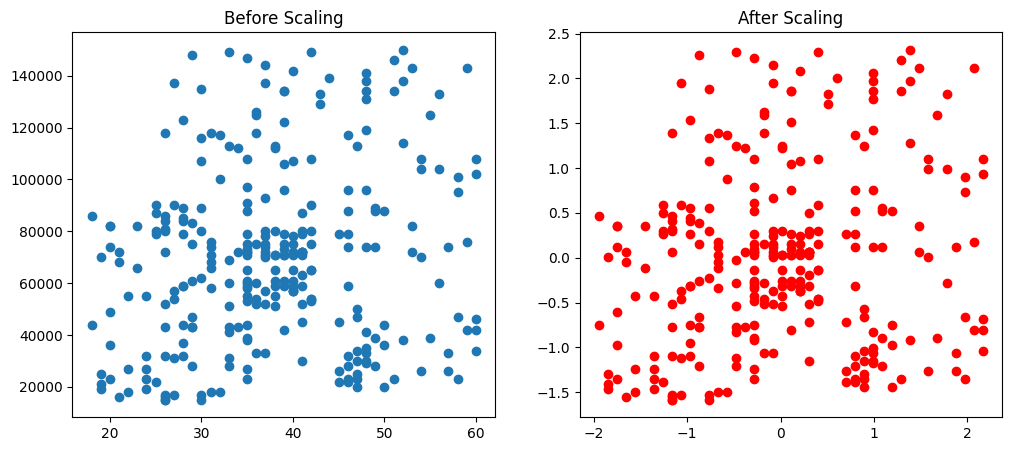

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

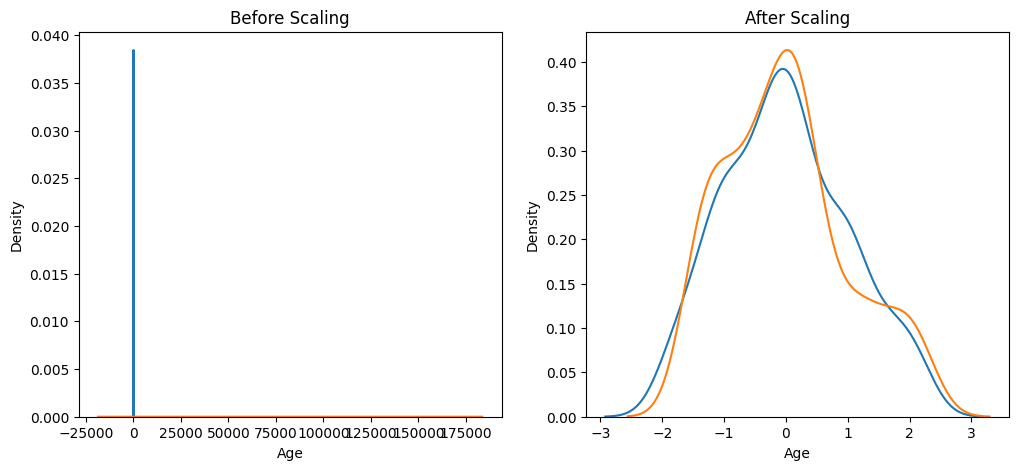

In [20]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

## before scaling
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

## after scaling
ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

## Comparison of Distribution 

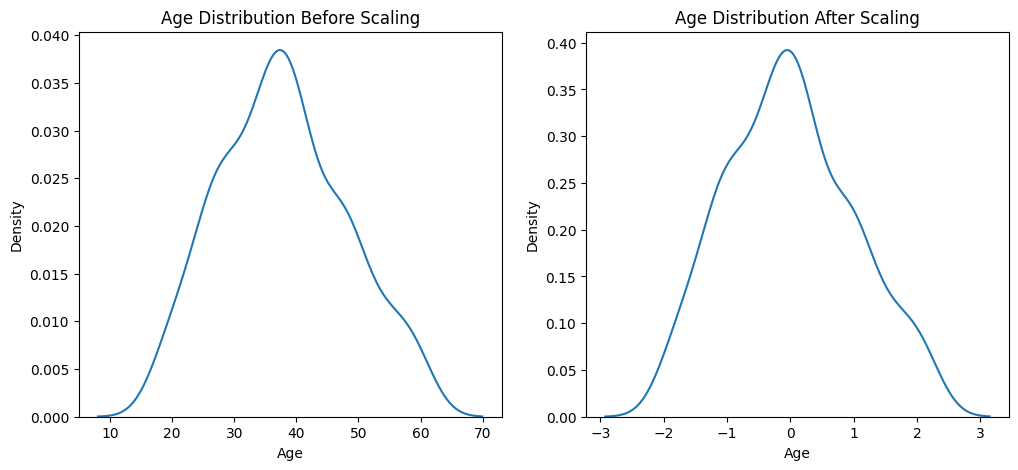

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

## before scaling
ax1.set_title("Age Distribution Before Scaling")
sns.kdeplot(X_train['Age'], ax=ax1)

## after scaling
ax2.set_title("Age Distribution After Scaling")
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

## Why scaling is important?


In [22]:
from sklearn.linear_model import LogisticRegression


In [23]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [24]:
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [25]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
print('Accuracy score before scaling: ', accuracy_score(y_test, y_pred))
print('Accuracy score after scaling: ', accuracy_score(y_test, y_pred_scaled))

Accuracy score before scaling:  0.875
Accuracy score after scaling:  0.8666666666666667


## Normalization 


In [28]:
## Normalization    
## Normalization is the process of scaling individual samples to have unit norm.
## This process can be useful if you plan to use a quadratic form such as the
#  dot-product or any other kernel to quantify the similarity of any pair of samples.

In [29]:
## types of Normalization
## 1. Min-Max Normalization
## 2. Mean Normalization
## 3. Max absolute Normalization
## 4. Robust Normalization

## MinMax Normalization or MinMax scaling 


In [30]:
## Min-Max Normalization
## formula for Min-Max Normalization is given by:
## X_scaled = (X - X.min / (X.max - X.min))

## Most of the time we talk about the NOrmalization as the Min-Max Normalization 

In [31]:
data = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day25-normalization/wine_data.csv')

In [32]:
data

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [33]:
data.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


## the data set have no columns name so we do some manipulation 

In [34]:
df1 = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day25-normalization/wine_data.csv',header=None,usecols=[0,1,2])
df1.columns = ['Class label', 'Alcohol', 'Malic acid']

In [35]:
df1.head()


,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

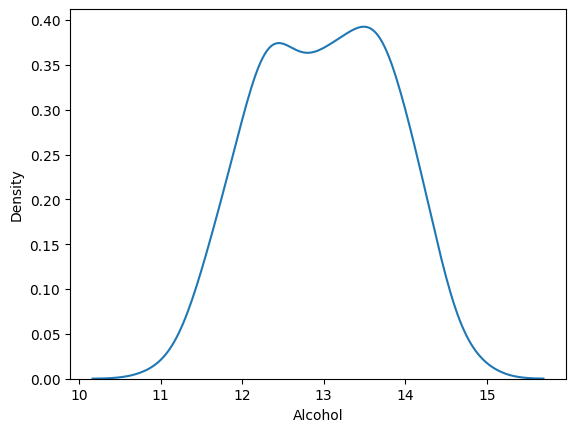

In [36]:
sns.kdeplot(df1['Alcohol'])

<Axes: xlabel='Malic acid', ylabel='Density'>

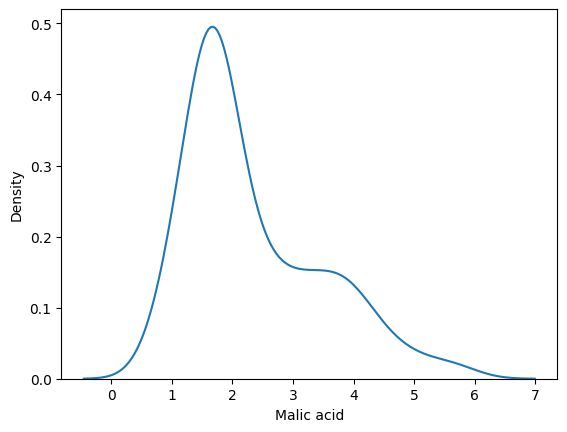

In [37]:
sns.kdeplot(df1['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

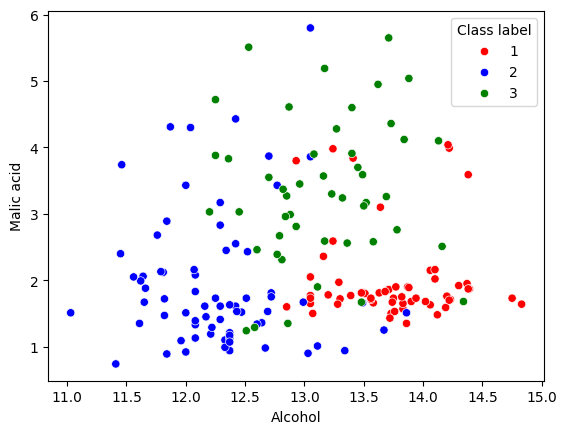

In [45]:
colors = {1:'red', 2:'blue', 3:'green'}
sns.scatterplot(x='Alcohol', y='Malic acid',hue='Class label',data=df1,palette=colors)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1.drop('Class label',axis=1),df1['Class label'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape



((124, 2), (54, 2))

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

## fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

## transform the train and test set
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [48]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [49]:
np.round(X_train.describe(), 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [50]:
np.round(X_train_scaled.describe(), 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


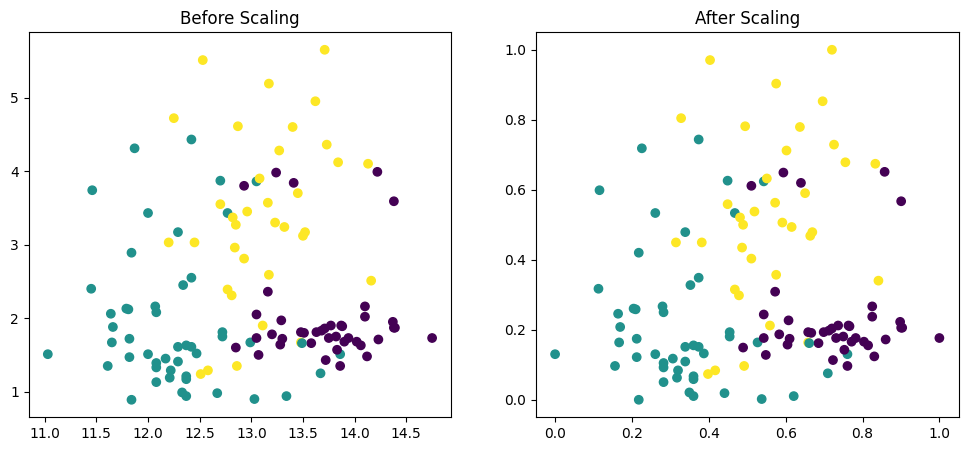

In [51]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Malic acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

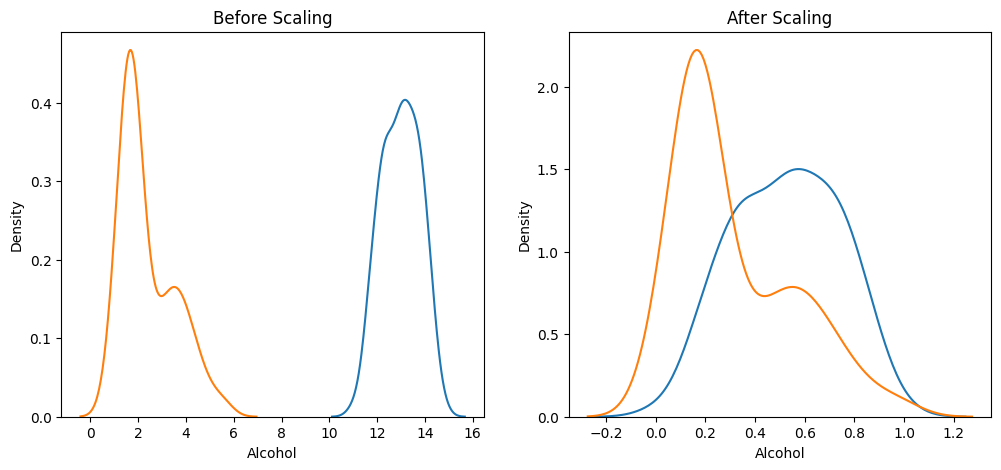

In [52]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

## before scaling
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)

## after scaling
ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

In [53]:
## Mean Normalization
## Mean normalization is the process of normalizing the data in such a way that 
# the mean of the data is 0 and the standard deviation is 1.

## formula for Mean Normalization is given by:
## X_scaled = (X - X.mean / X.max - X.min)

In [54]:
## Max absolute Normalization
## Max absolute normalization scales the data in such a way that 
## the maximum absolute value of each feature is 1.0.

## formula for Max absolute Normalization is given by:
## X_scaled = X / X.abs().max()
## mostly used when the standard deviation is very small or close to zero.
## and the data contains larger number of 0's 

In [ ]:
## Robust Normalization
## Robust normalization is used to scale the data in 
## such a way that the median is 0 and the quantiles are spread out.

## formula for Robust Normalization is given by:
## X_scaled = (X - X.median) / (Q3 - Q1) 
# where Q3 is the 75th percentile and Q1 is the 25th percentile.